# Importação de bibliotecas

In [ ]:
# Manipulação dos dados
import numpy as np
import pandas as pd

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Preparação dos dados, treinamento e execução dos modelos
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer


# Importação dos dados

O dataset utilizado pode ser encontrado gratuitamente no link abaixo.

https://drive.google.com/file/d/1jHFeqT8nIhjgZSSZsddEtSnOJITXuQWs/view?usp=sharing

In [ ]:
df = pd.read_csv('/content/data.csv',encoding='unicode_escape')
display(df)
'InvoiceNo','StockCode','Quantity','UnitPrice','CustomerID'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


('InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID')

# Descrição estatística inicial dos dados (pré-tratamento)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Vemos da descrição estatística que existem valores não positivos nas colunas 'Quantity' e 'UnitPrice'. Estes valores devem ser removidos.

# Verificando o formato das colunas e presença de dados nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Vemos que existem valores nulos nas colunas 'Description' e 'CustomerID', os quais serão removidos posteriormente.

# Tratamento de dados

## Remoção de valores não positivos das colunas 'Quantity' e 'TotalPrice'

In [ ]:
# contando valores não positivos nas referidas colunas
x = df['Quantity'][df['Quantity']<=0].count()
y = df['UnitPrice'][df['UnitPrice']<=0].count()
print(f"Existem {x} valores não positivos na coluna 'Quantity' \
antes do tratamento de dados nulos.")
print(f"Existem {y} valores não positivos na coluna 'UnitPrice' \
antes do tratamento de dados nulos.")
print(100*'-')

# Removendo estes valores
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

# Verificando que o tratamento foi bem sucedido
x = df['Quantity'][df['Quantity']<=0].count()
y = df['UnitPrice'][df['UnitPrice']<=0].count()
print(f"Existem {x} valores não positivos na coluna 'Quantity'\
 após o tratamento.")
print(f"Existem {y} valores não positivos na coluna 'UnitPrice'\
 após o tratamento.")

Existem 10624 valores não positivos na coluna 'Quantity' antes do tratamento de dados nulos.
Existem 2517 valores não positivos na coluna 'UnitPrice' antes do tratamento de dados nulos.
----------------------------------------------------------------------------------------------------
Existem 0 valores não positivos na coluna 'Quantity' após o tratamento.
Existem 0 valores não positivos na coluna 'UnitPrice' após o tratamento.


## Tratamento de dados nulos

Vimos que existem dados nulos nas colunas 'Description' e 'CustomerID'. Apesar da coluna 'CustomerID' numérica, o código de identificação do cliente age como uma variável categórica. Vamos ver a porcentagem de ocorrência das modas de ambas as colunas para decidir se removermos os valores nulos ou ps sbstituímos pela moda.

In [ ]:
# Identificando as modas
df['Description'].mode()
df['CustomerID'].mode()

# Calculando a frequência das mesmas
x = 100*(len(df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'])/len(df))
y = 100*(len(df[df['CustomerID']==17841.0])/len(df))
print(f"A moda representa {x}% dos valores da coluna 'Description'.")
print(f"A moda representa {y}% dos valores da coluna 'CustomerID'.")

A moda representa 0.43821589725789656% dos valores da coluna 'Description'.
A moda representa 1.4802755685676774% dos valores da coluna 'CustomerID'.


Vimos que a moda é muito pouco representativa para ambas colunas e não corresponde a nem 2% das ocorrência nem para coluna 'Description' nem para a 'CustomerID'. Vamos então simplesmente remover os dados nulos.

In [ ]:
# Já vimos que existem dados nulos apenas nas colunas 'Description' e 'CustomerID'.
print('Dados nulos iniciais:')
print(df.isna().sum())
print(100*'_')

# Vamos remover as linhas com esses dados.
df = df.dropna(axis=0,how='any',subset=['Description','CustomerID'])
print('Removemos dados nulos')
print(100*'_')

# Vemos que agora não existem mais dados nulos
print('Dados nulos finais:')
print(df.isna().sum())

Dados nulos iniciais:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64
____________________________________________________________________________________________________
Removemos dados nulos
____________________________________________________________________________________________________
Dados nulos finais:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Note que antes deste tratamento só havia dados nulos na coluna 'CustomerID'. Isto significa que os dados nulos da coluna 'Description' apareciam junto com os dados negativos removidos no tratamento anterior.

## Tratamento de duplicatas

In [ ]:
# Verificando a existência de linhas duplicadas
x = 100*(len(df[df.duplicated(keep=False)])/len(df))
print("Vemos que cerca de {}% das linhas correspondem a duplicatas.".format(round(x,2)))

# Removendo duplicatas e verificando o resultado.
df = df.drop_duplicates()
x = 100*(len(df[df.duplicated(keep=False)])/len(df))
y = len(df)
print("Após o tratamento vemos agora que {}% das linhas correspondem a duplicatas e nosso dataset \
ficou com {} linhas.".format(x,y))

Vemos que cerca de 2.51% das linhas correspondem a duplicatas.
Após o tratamento vemos agora que 0.0% das linhas correspondem a duplicatas e nosso dataset ficou com 392692 linhas.


# Análise exploratória dos dados


## Acrescentando uma coluna de preço total da transação ('Quantity' x 'UnitPrice')

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


## Descrição estatística dos dados

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500
std,180.492832,22.241836,1713.539549,311.099224
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


## Gasto total por cliente

,CustomerID,TotalPrice,Percentage (%)
1689,14646.0,280206.02,3.152914
4201,18102.0,259657.30,2.921697
3728,17450.0,194390.79,2.187310
3008,16446.0,168472.50,1.895674
1879,14911.0,143711.17,1.617056
55,12415.0,124914.53,1.405554
1333,14156.0,117210.08,1.318863
3771,17511.0,91062.38,1.024645
2702,16029.0,80850.84,0.909744
0,12346.0,77183.60,0.868480


____________________________________________________________________________________________________
Os 10 clientes que mais gastam totalizam 17.301936168487227% dos gastos de 4338 clientes.
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Existem 4338 clientes no total.
____________________________________________________________________________________________________


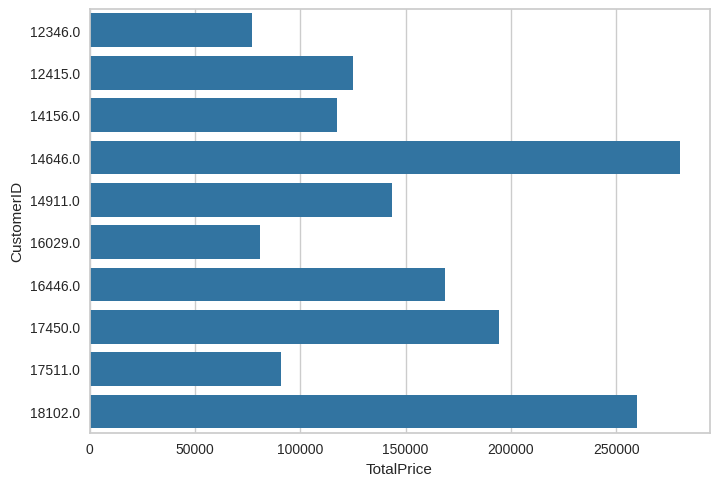

In [ ]:
df_client = pd.DataFrame(df.groupby('CustomerID')['TotalPrice'].sum(),\
                         columns=['TotalPrice'])
df_client = df_client.reset_index().sort_values('TotalPrice',ascending=False)
df_client['Percentage (%)'] = 100*(df_client['TotalPrice']/df_client['TotalPrice'].sum())
df1 = df_client.head(10)
display(df1)
sns.barplot(data=df1,x="TotalPrice",y="CustomerID",color=plt.get_cmap('tab20').colors[0],orient='h')
print(100*"_")
print(f"Os 10 clientes que mais gastam totalizam {df1['Percentage (%)'].sum()}% \
dos gastos de {len(df_client)} clientes.")
print(100*"_")
print(100*"_")
print(f"Existem {df['CustomerID'].nunique()} clientes no total.")
print(100*"_")


## % de transações de cada cliente

,CustomerID,TotalTransactions,Percentage
4010,17841.0,7676,1.954713
1879,14911.0,5670,1.443880
1289,14096.0,5111,1.301529
326,12748.0,4412,1.123527
1661,14606.0,2677,0.681705
2176,15311.0,2366,0.602508
1689,14646.0,2076,0.528659
562,13089.0,1814,0.461940
690,13263.0,1667,0.424506
1434,14298.0,1637,0.416866


____________________________________________________________________________________________________
Os dez clientes que compram mais frequentemente totalizam 8.939830707017203% das transações.
____________________________________________________________________________________________________


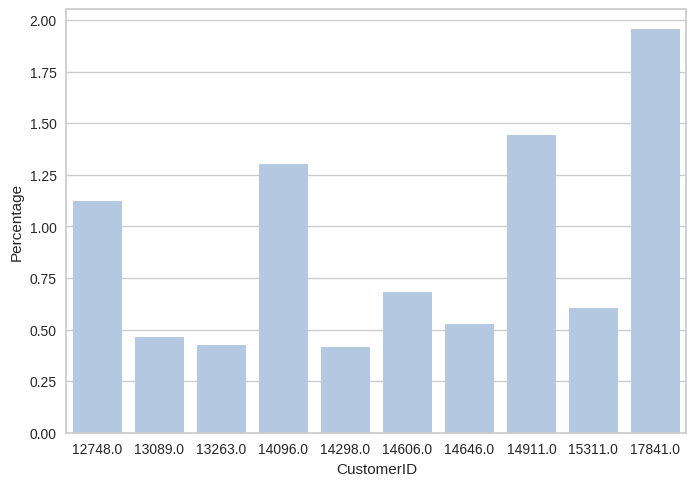

In [ ]:
df_client_participation = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].count())
df_client_participation.columns=['TotalTransactions']
df_client_participation = df_client_participation.reset_index()
df_client_participation = df_client_participation.sort_values('TotalTransactions',\
                                                             ascending = False)
df_client_participation
df_client_participation['Percentage'] = 100*(df_client_participation['TotalTransactions']\
                                      /df_client_participation['TotalTransactions'].sum())
df2 = df_client_participation.head(10)
display(df2)

sns.barplot(data = df2,x = df2['CustomerID'],y=df2['Percentage'],color=plt.get_cmap('tab20').colors[1])
print(100*"_")
print(f"Os dez clientes que compram mais frequentemente totalizam {df2['Percentage'].sum()}% das transações.")
print(100*"_")

## % de cada descrição de produto ('Description'):

,Description,TransactionQuantities,Percentage
3698,WHITE HANGING HEART T-LIGHT HOLDER,2016,0.513379
2767,REGENCY CAKESTAND 3 TIER,1713,0.436220
1762,JUMBO BAG RED RETROSPOT,1615,0.411264
216,ASSORTED COLOUR BIRD ORNAMENT,1395,0.355240
2345,PARTY BUNTING,1389,0.353712
1943,LUNCH BAG RED RETROSPOT,1303,0.331812
3001,SET OF 3 CAKE TINS PANTRY DESIGN,1152,0.293360
2611,POSTAGE,1099,0.279863
1935,LUNCH BAG BLACK SKULL.,1078,0.274515
2269,PACK OF 72 RETROSPOT CAKE CASES,1050,0.267385


____________________________________________________________________________________________________
A descrição modal representa 0.5133794424128835% da frequência de descrições.
____________________________________________________________________________________________________


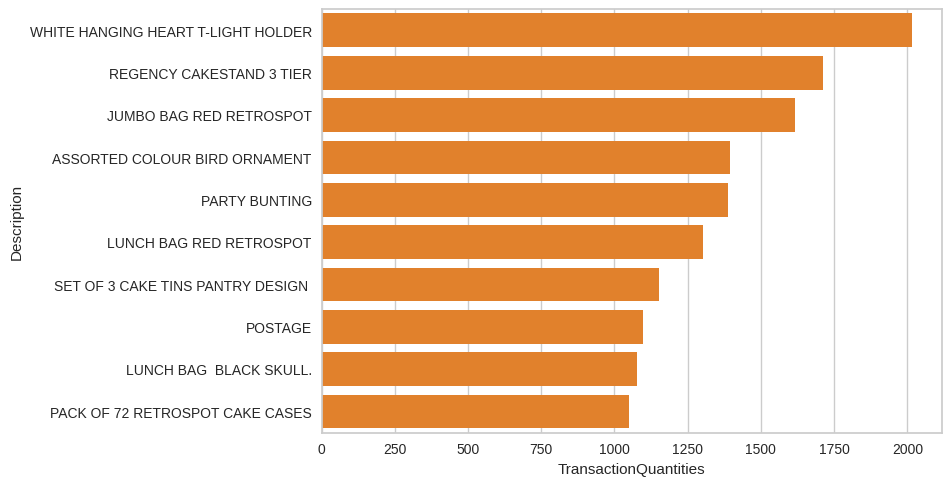

In [ ]:
df3 = df.groupby('Description')['InvoiceNo'].count().to_frame()
df3.columns = ['TransactionQuantities']
df3 = df3.reset_index()
df3 = df3.sort_values('TransactionQuantities',ascending=False)
df3['Percentage'] = 100*(df3['TransactionQuantities']/df3['TransactionQuantities'].sum())
df3 = df3.head(10)

display(df3.head(10))

sns.barplot(data = df3,x = df3['TransactionQuantities'],y=df3['Description'],color=plt.get_cmap('tab20').colors[2],orient='h')

print(100*"_")
print(f"A descrição modal representa {df3['Percentage'].max()}% da frequência de descrições.")
print(100*"_")

## % consumo por produto ('Description'):

,Description,TotalPrice,Percentage
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60,1.895641
2767,REGENCY CAKESTAND 3 TIER,142264.75,1.600781
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10,1.129625
1762,JUMBO BAG RED RETROSPOT,85040.54,0.956887
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,0.916111


____________________________________________________________________________________________________
A descrição mais consumida representa cerca de 1.9% do consumo.
____________________________________________________________________________________________________


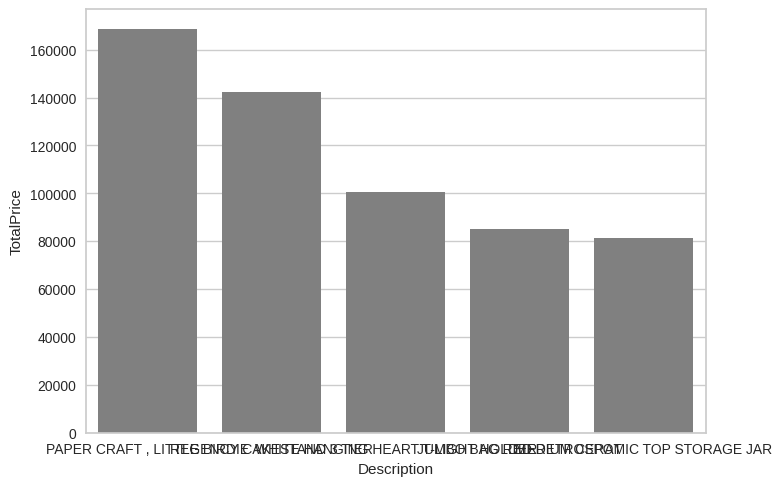

In [ ]:
df_prod = df.groupby('Description')['TotalPrice'].sum().to_frame().reset_index()
df_prod
df_prod['Percentage'] = 100*(df_prod['TotalPrice']/df_prod['TotalPrice'].sum())
df_prod = df_prod.sort_values('Percentage',ascending = False)
df_prod5 = df_prod.head(5)
display(df_prod.head(5))

sns.barplot(data = df_prod5,x = df_prod5['Description'],y = df_prod5['TotalPrice'],color='gray')

print(100*"_")
print(f"A descrição mais consumida representa cerca de {round(df_prod5['Percentage'].max(),2)}% do consumo.")
print(100*"_")

## Total de consumo por país

In [ ]:
df4 = df.groupby('Country')['TotalPrice'].sum().to_frame().reset_index().sort_values('TotalPrice',ascending=False)
df4['Percentage'] = 100*(df4['TotalPrice']/df4['TotalPrice'].sum())
df4 = df4.reset_index()
df4 = df4.drop(columns=['index'])
x = df4.loc[6:,'TotalPrice'].sum()
y = df4.loc[6:,'Percentage'].sum()
aux = pd.DataFrame(['Others',x,y])
aux = aux.T
aux.columns = ['Country','TotalPrice','Percentage']
aux.index = [6]
aux
df4 = df4.iloc[0:6,:]
df4 = pd.concat([df4,aux])
display(df4)

,Country,TotalPrice,Percentage
0,United Kingdom,7285024.644,81.97202
1,Netherlands,285446.34,3.211878
2,EIRE,265262.46,2.984767
3,Germany,228678.4,2.573118
4,France,208934.31,2.350955
5,Australia,138453.81,1.5579
6,Others,475408.93,5.349361


([<matplotlib.patches.Wedge at 0x7a1ecdca3c10>,
 [Text(-1.0989941906065754, 0.04702944835949632, 'United Kingdom'),
  Text(0.9609685752442568, -0.5352937486960064, 'Netherlands'),
  Text(1.0463672228077165, -0.33928695087442823, 'EIRE'),
  Text(1.0893982675934466, -0.1523529276528596, 'Germany'),
  Text(1.0998636552032592, 0.017318774867931867, 'France'),
  Text(1.0894597365962724, 0.1519127457969894, 'Australia'),
  Text(1.0312032508628484, 0.3829097222713124, 'Others')],
 [Text(-0.5994513766944956, 0.025652426377907083, '81.97%'),
  Text(0.5241646774059582, -0.29197840837963984, '3.21%'),
  Text(0.570745757895118, -0.1850656095678699, '2.98%'),
  Text(0.5942172368691526, -0.08310159690155977, '2.57%'),
  Text(0.5999256301108686, 0.00944660447341738, '2.35%'),
  Text(0.5942507654161485, 0.08286149770744876, '1.56%'),
  Text(0.5624745004706445, 0.20885984851162492, '5.35%')])

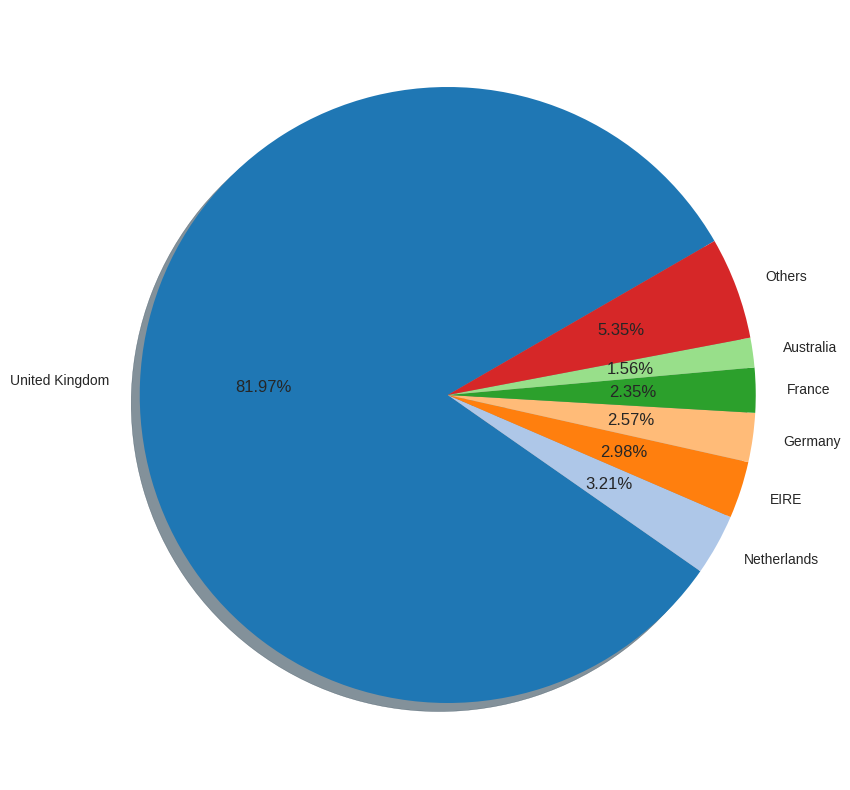

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.pie(df4['TotalPrice'],labels=df4['Country'],autopct="%.2f%%",shadow=True,startangle=30,
       colors=plt.get_cmap('tab20').colors)

<Axes: xlabel='Country', ylabel='TotalPrice'>

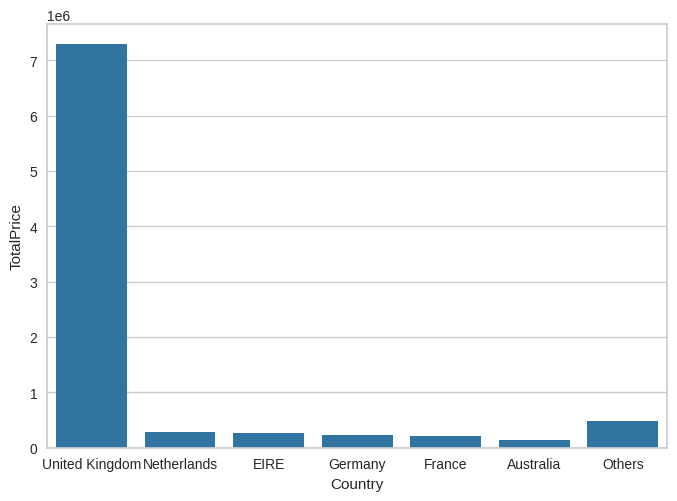

In [ ]:
sns.barplot(data = df4,x = 'Country',y='TotalPrice',color= plt.get_cmap('tab20').colors[0])

## Total de transações por país

,Country,Total_transactions,Percentage
0,United Kingdom,349203,88.925417
1,Germany,9025,2.298239
2,France,8326,2.120237
3,Others,26138,6.656107


<Axes: xlabel='Total_transactions', ylabel='Country'>

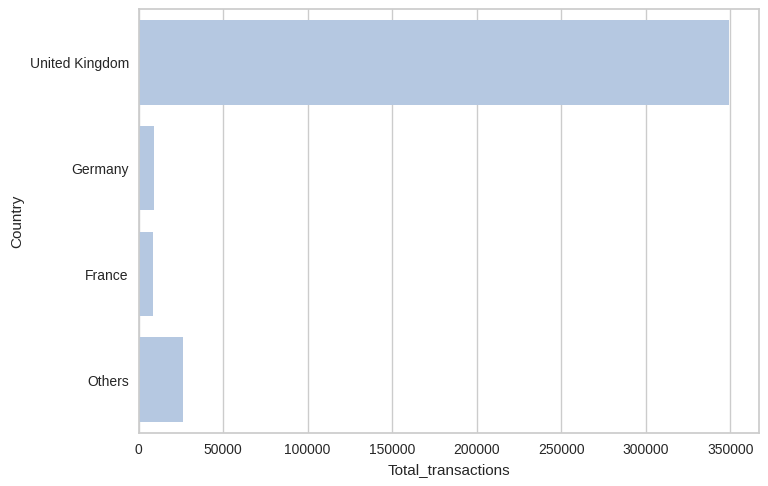

In [ ]:
df6 = df.groupby('Country')['InvoiceNo'].count().to_frame().reset_index().sort_values('InvoiceNo',ascending=False)
df6.columns=['Country','Total_transactions']
df6['Percentage'] = 100*(df6['Total_transactions']/df6['Total_transactions'].sum())
df6 = df6.reset_index()
df6 = df6.drop(columns=['index'])

x = df6.loc[3:,'Total_transactions'].sum()
y = df6.loc[3:,'Percentage'].sum()

df6 = df6.iloc[0:3,:]
aux = pd.DataFrame(['Others',x,y]).T
aux.columns = ['Country','Total_transactions','Percentage']
aux.index = [3]
df6 = pd.concat([df6,aux])

display(df6)

sns.barplot(data = df6,x = 'Total_transactions',y='Country',color=plt.get_cmap('tab20').colors[1])

([<matplotlib.patches.Wedge at 0x7a1ecd28f640>,
 [Text(-1.0830686257478315, -0.19225595418791108, 'United Kingdom'),
  Text(1.0945005616797667, -0.10985681809826488, 'Germany'),
  Text(1.099173225057572, 0.04264060642786794, 'France'),
  Text(1.0460493882494803, 0.3402655982359785, 'Others')],
 [Text(-0.5907647049533625, -0.10486688410249694, '88.93%'),
  Text(0.5970003063707818, -0.05992190078087174, '2.30%'),
  Text(0.5995490318495846, 0.023258512597018874, '2.12%'),
  Text(0.5705723935906255, 0.1855994172196246, '6.66%')])

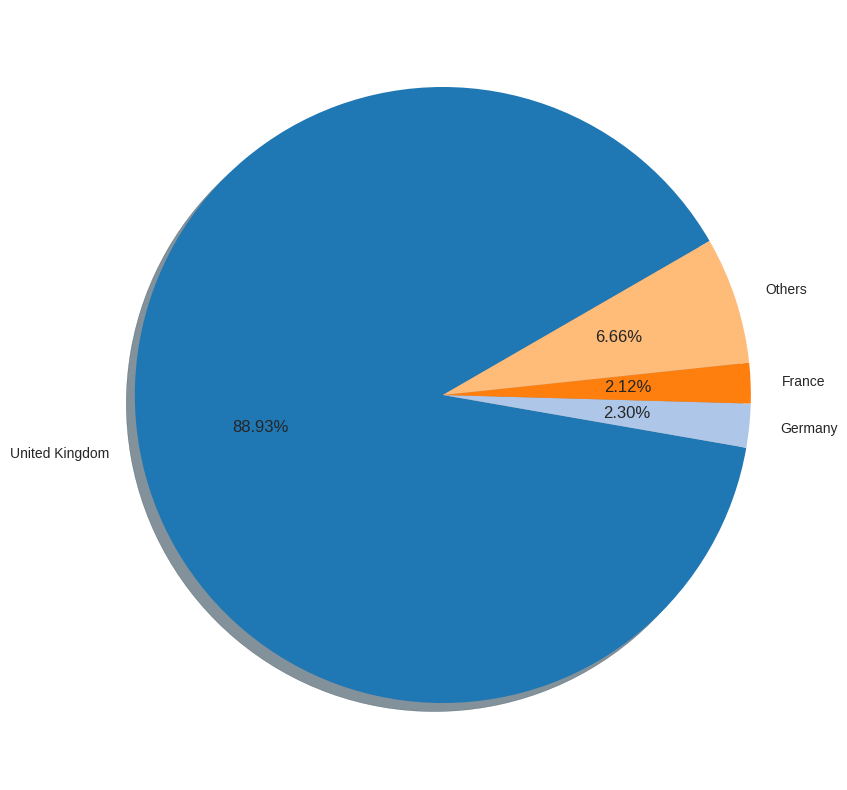

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.pie(df6['Total_transactions'],labels=df6['Country'],autopct="%.2f%%",shadow=True,startangle=30,
       colors=plt.get_cmap('tab20').colors)

Vemos desses resultados que nenhum cliente é responsável por mais de 2% das transações nem por mais de 4% dos gastos. Contudo devido ao número grande de clientes, podemos ainda assim inferir que existe uma grande disparidade nos gastos e número de transações dos clientes. Essa disparidade entretanto é muito maior quando consideramos os gastos e números de transações por país, já que o Reino Unido sozinho é responsável por mais de 80% dos gastos e 90% das transações, sendo o principal público alvo da empresa. O produto mais consumido corresponde a pouco mais de 0,5% das transações.O produto WHITE HANGING HEART T-LIGHT HOLDER é o que possui o maior número de transações e o terceiro maior responsável pelos gastos dos clientes, enquanto o produto PAPER CRAFT , LITTLE BIRDIE	é o campeão de gasto total de gastos dos clientes, embora possua bem menor número de transações.Nenhum produto é responsável por mais de 2% dos gastos de clientes ou mais de 1% das transações, de modo que a diversificação de produtos da empresa fornece uma segurança razoável. Do ponto de vista de diversificação, a empresa precisa essencialmente investir em diversificação geográfica.

Para fazer a segmentação dos clientes vamos considerar as clássicas métricas R,F e M.Como o Reino Unido sozinho é responsável por mais de 90% das transações e mais de 80% dos gastos, não faremos segmentação por país nesta primeira aproximação. Sendo assim visamos aplicar um algoritmo de agrupamento trabalhando com 3 variáveis numéricas (as métricas R, F e M) agrupar uma grande quantidade de clientes. O algoritmo k-means se mostra um bom candidato para este estudo e será utilizado. Vamos primeiramente calcular as métricas R, F e M por cliente.

# Determinação das métricas R, F e M

## Determinação da recência medida em dias (R)

In [ ]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
R = df.groupby('CustomerID')['InvoiceDate'].max().to_frame().reset_index()
R.columns = ['CustomerID','R']
R['R'] = df['InvoiceDate'].max()-R['R']
R['R'] = R['R'].dt.days
display(R)

,CustomerID,R
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


## Determição da frequência

In [ ]:
F = df.groupby('CustomerID')['InvoiceNo'].count().to_frame().reset_index()
F.columns = ['CustomerID','F']
display(F)

,CustomerID,F
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


## Determinação do ticket médio

In [ ]:
M = df.groupby('CustomerID')['TotalPrice'].mean().to_frame().reset_index()
M.columns = ['CustomerID','M']
display(M)

,CustomerID,M
0,12346.0,77183.600000
1,12347.0,23.681319
2,12348.0,57.975484
3,12349.0,24.076027
4,12350.0,19.670588
...,...,...
4333,18280.0,18.060000
4334,18281.0,11.545714
4335,18282.0,14.837500
4336,18283.0,2.837074


## Dataframe das métricas RFM

In [ ]:
RFM = R.copy()
RFM['F'] = F['F']
RFM['M'] = M['M']
display(RFM)

,CustomerID,R,F,M
0,12346.0,325,1,77183.600000
1,12347.0,1,182,23.681319
2,12348.0,74,31,57.975484
3,12349.0,18,73,24.076027
4,12350.0,309,17,19.670588
...,...,...,...,...
4333,18280.0,277,10,18.060000
4334,18281.0,180,7,11.545714
4335,18282.0,7,12,14.837500
4336,18283.0,3,721,2.837074


# Pré-processamento de dados

## Detecção de outliers

Boxplot antes da remoção dos outliers
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


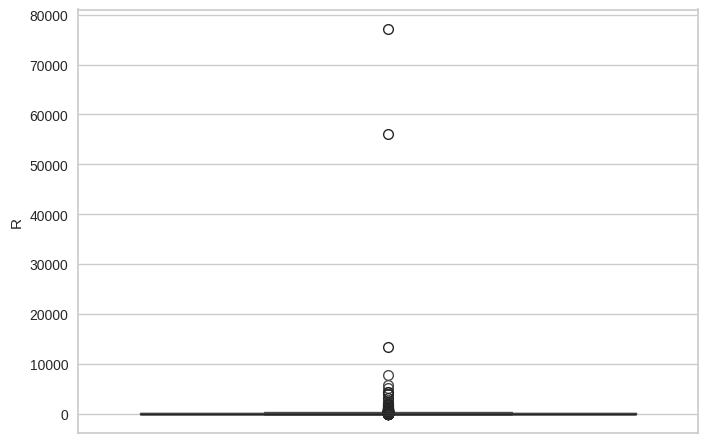

In [ ]:
# Gráfico boxplot
print('Boxplot antes da remoção dos outliers')
sns.boxplot(RFM['R'],color='blue')
sns.boxplot(RFM['F'],color='red')
sns.boxplot(RFM['M'],color='green')
print(100*'--')

Vemos que existem outliers tão distantes da mediana que ocultam o gráfico boxplot.

Boxplot após a remoção dos outliers


,CustomerID,R,F,M
0,12347.0,1,182,23.681319
1,12349.0,18,73,24.076027
2,12350.0,309,17,19.670588
3,12352.0,35,85,29.482824
4,12353.0,203,4,22.250000
...,...,...,...,...
3355,18278.0,73,9,19.322222
3356,18280.0,277,10,18.060000
3357,18281.0,180,7,11.545714
3358,18282.0,7,12,14.837500


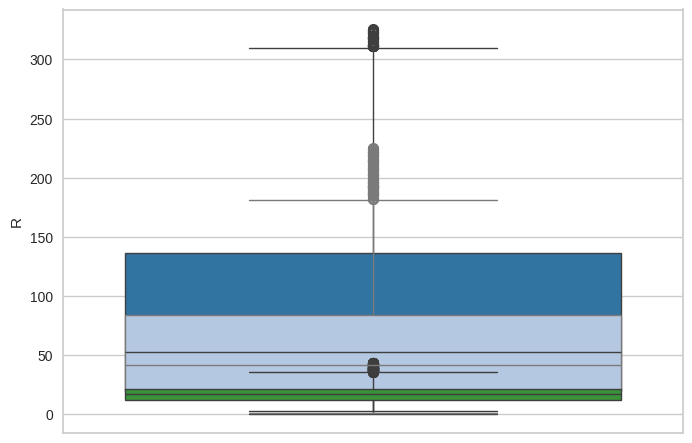

In [ ]:
# Definindo uma função que retorna um dataframe eliminando as linhas com outliers de uma dada coluna
def out_remove(df:pd.DataFrame,label: str):
  Q1 = np.percentile(df[label],25)
  Q3 = np.percentile(df[label],75)
  x = 1.5*(Q3-Q1)
  final = df[(Q1-x<df[label]) & (df[label]<Q3+x)]
  return final

# Aplicando a função nas colunas 'R', 'F' e 'M' e removendo os outliers:
for item in ['R','F','M']:
  RFM = out_remove(RFM,item)

print('Boxplot após a remoção dos outliers')
sns.boxplot(RFM['R'],color=plt.get_cmap('tab20').colors[0])
sns.boxplot(RFM['F'],color=plt.get_cmap('tab20').colors[1])
sns.boxplot(RFM['M'],color=plt.get_cmap('tab20').colors[4])

RFM = RFM.reset_index()
RFM = RFM.drop('index',axis=1)
display(RFM)

Vemos que os outliers foram removidos com sucesso!

# Normalização dos dados

In [ ]:
X = RFM[['R','F','M']]
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X),\
                    columns = ['R','F','M'])
display(X)
X.describe()

,R,F,M
0,0.003067,0.808036,0.525733
1,0.055215,0.321429,0.535371
2,0.947853,0.071429,0.427800
3,0.107362,0.375000,0.667394
4,0.622699,0.013393,0.490784
...,...,...,...
3355,0.223926,0.035714,0.419294
3356,0.849693,0.040179,0.388473
3357,0.552147,0.026786,0.229408
3358,0.021472,0.049107,0.309787


,R,F,M
count,3360.000000,3360.000000,3360.000000
mean,0.267567,0.257207,0.370611
std,0.272162,0.230078,0.202431
min,0.000000,0.000000,0.000000
25%,0.061350,0.080357,0.239722
50%,0.159509,0.178571,0.364473
75%,0.417178,0.370536,0.467452
max,1.000000,1.000000,1.000000


# Implementando o algoritmo de agrupamento K-Means

## Determinando o número de clusters (grupos) adequado pelo "método do cotovelo"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

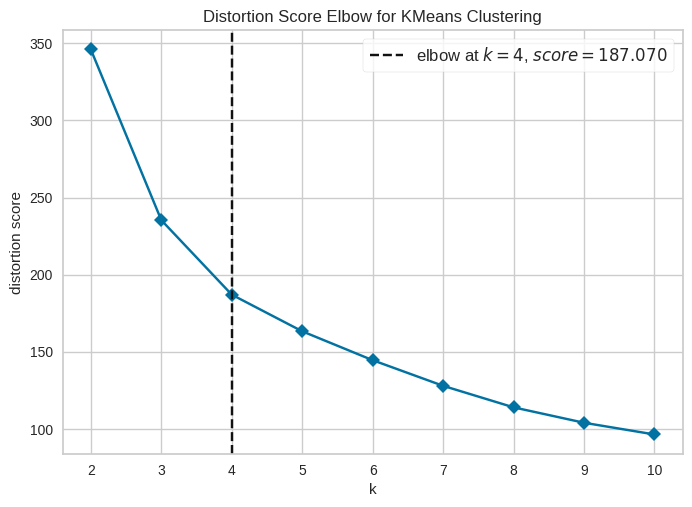

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
kelbow_visualizer(KMeans(),X,k=10,timings=False)

Consideraremos então k=4 clusters (grupos).

## Implementando o modelo

In [ ]:
model = KMeans(n_clusters=4)
model.fit(X)
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

print(f"Centróides = {centroids}.")
print(f"Rótulos = {labels}.")
print(f"Inércia = {inertia}.")

Y = pd.DataFrame(labels)
Y.columns=['Y']
Result = RFM.copy()
Result['Y'] = Y['Y']
Result

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centróides = [[0.14592151 0.17820628 0.30294993]
 [0.70507429 0.12145483 0.36168519]
 [0.0997955  0.63599868 0.29420863]
 [0.15116466 0.17983796 0.67982908]].
Rótulos = [2 3 1 ... 1 0 3].
Inércia = 187.06981733986322.


,CustomerID,R,F,M,Y
0,12347.0,1,182,23.681319,2
1,12349.0,18,73,24.076027,3
2,12350.0,309,17,19.670588,1
3,12352.0,35,85,29.482824,3
4,12353.0,203,4,22.250000,1
...,...,...,...,...,...
3355,18278.0,73,9,19.322222,0
3356,18280.0,277,10,18.060000,1
3357,18281.0,180,7,11.545714,1
3358,18282.0,7,12,14.837500,0


# Análise dos resultados

In [ ]:
grupo0 = Result[Result['Y']==0]
grupo1 = Result[Result['Y']==1]
grupo2 = Result[Result['Y']==2]
grupo3 = Result[Result['Y']==3]

In [ ]:
grupo0.head(20)

,CustomerID,R,F,M,Y
10,12364.0,7,85,15.448235,0
12,12367.0,3,11,15.354545,0
21,12379.0,81,40,21.306000,0
23,12381.0,4,87,21.210460,0
25,12384.0,28,27,21.676667,0
27,12390.0,79,32,17.182500,0
32,12398.0,45,85,19.243059,0
33,12399.0,118,59,18.790678,0
38,12407.0,49,77,22.183377,0
41,12412.0,74,61,20.112787,0


In [ ]:
grupo1.head(20)

,CustomerID,R,F,M,Y
2,12350.0,309,17,19.670588,1
4,12353.0,203,4,22.250000,1
5,12354.0,231,58,18.610345,1
6,12355.0,213,13,35.338462,1
8,12361.0,286,10,18.990000,1
11,12365.0,290,22,29.153636,1
16,12373.0,310,14,26.042857,1
19,12377.0,314,77,21.144416,1
24,12383.0,184,99,18.692525,1
34,12401.0,302,5,16.860000,1


In [ ]:
grupo2.head(20)

,CustomerID,R,F,M,Y
0,12347.0,1,182,23.681319,2
7,12360.0,51,129,20.636124,2
13,12370.0,50,166,21.336988,2
20,12378.0,129,219,18.304201,2
28,12391.0,21,93,4.727527,2
30,12395.0,18,156,19.350192,2
31,12397.0,35,126,19.126190,2
44,12417.0,2,192,19.005729,2
49,12423.0,0,125,14.874480,2
57,12437.0,1,199,24.881457,2


In [ ]:
grupo3.head(20)

,CustomerID,R,F,M,Y
1,12349.0,18,73,24.076027,3
3,12352.0,35,85,29.482824,3
9,12363.0,109,23,24.000000,3
14,12371.0,44,63,29.967619,3
15,12372.0,71,52,24.962308,3
17,12374.0,24,33,22.513030,3
18,12375.0,10,17,26.911765,3
22,12380.0,21,104,26.200096,3
26,12388.0,15,100,27.806600,3
29,12393.0,71,64,24.728125,3


# Análise dos resultados

,Y,R
0,0,47.570413
1,1,229.854220
2,2,32.533333
3,3,49.279678


<Axes: title={'center': 'Recência'}, xlabel='Y', ylabel='R'>

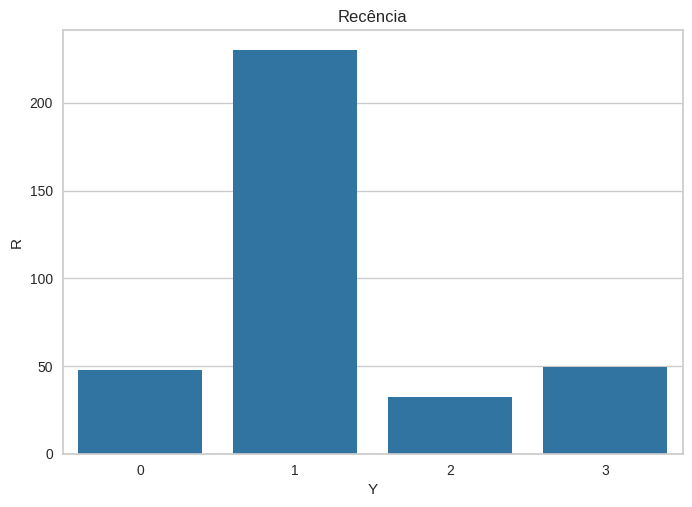

In [ ]:
df1 = pd.DataFrame(Result.groupby('Y')['R'].mean()).reset_index()
display(df1)
plt.title('Recência')
sns.barplot(data=df1,x='Y',y='R',color=plt.get_cmap('tab20').colors[0])

,Y,F
0,0,40.918208
1,1,28.205882
2,2,143.463704
3,3,41.283702


<Axes: title={'center': 'Frequência'}, xlabel='Y', ylabel='F'>

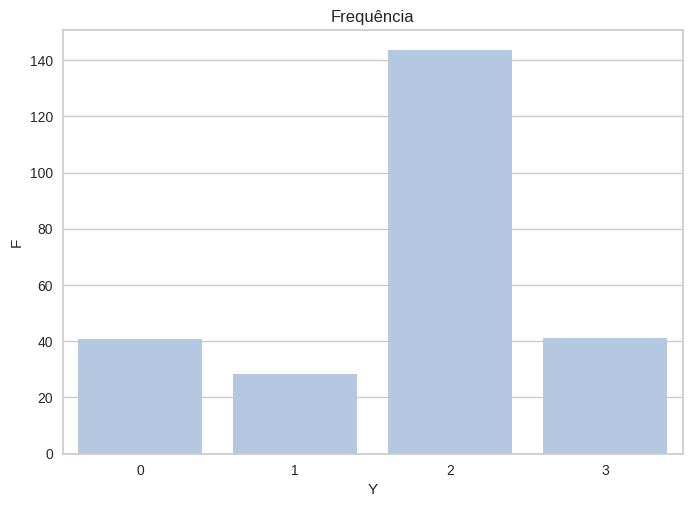

In [ ]:
df2 = pd.DataFrame(Result.groupby('Y')['F'].mean()).reset_index()
display(df2)
plt.title('Frequência')
sns.barplot(data=df2,x='Y',y='F',color=plt.get_cmap('tab20').colors[1])

,Y,M
0,0,14.557508
1,1,16.962934
2,2,14.199519
3,3,29.992103


<Axes: title={'center': 'Ticket médio'}, xlabel='Y', ylabel='M'>

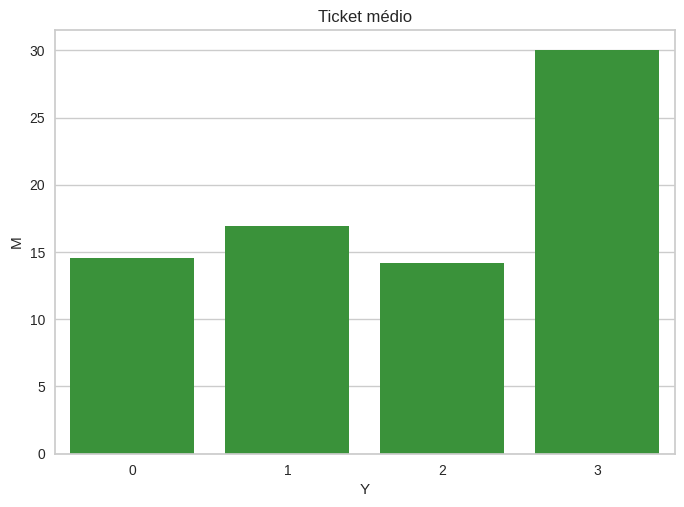

In [ ]:
df3 = pd.DataFrame(Result.groupby('Y')['M'].mean()).reset_index()
display(df3)
plt.title('Ticket médio')
sns.barplot(data=df3,x='Y',y='M',color=plt.get_cmap('tab20').colors[4])

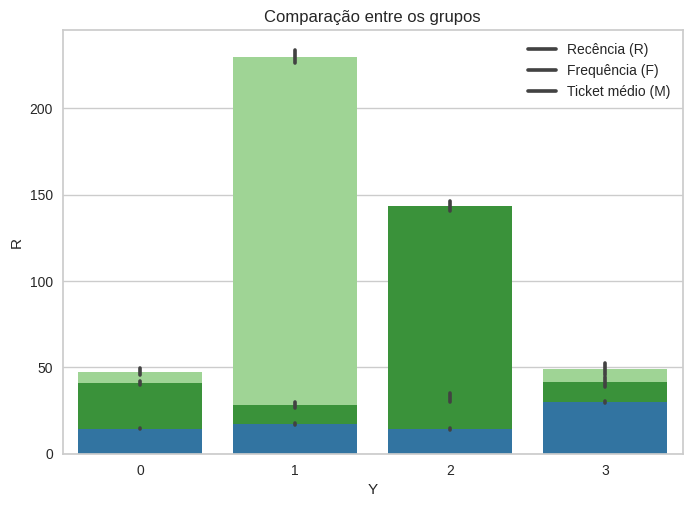

In [ ]:
plt.title('Comparação entre os grupos')
sns.barplot(data=Result,x='Y',y='R',color=plt.get_cmap('tab20').colors[5])
sns.barplot(data=Result,x='Y',y='F',color=plt.get_cmap('tab20').colors[4])
sns.barplot(data=Result,x='Y',y='M',color=plt.get_cmap('tab20').colors[0])
plt.legend(['Recência (R)','Frequência (F)','Ticket médio (M)'],loc='upper right')

# Conclusões e propostas

Com base nas tabelas e gráficos obtidos tira-se a seguinte conclusão a respeito da segmentação dos clientes:

 Os clientes do grupo 2 possuem menor recência e são os mais frequentes nas compras. São clientes assíduos que fazem compras mais baratas porém com mais frequência e portanto não demandam esforço especial do grupo de marketing, sendo talvez interessante apresentar produtos um pouco acima do ticket médio deles para aumentar o gasto dos mesmos. É interessante procurar obter avaliações e feedbacks deles para garantir a continuidade da assiduidade dos mesmos, uma vez que são clientes que já são fidelizados à empresa.

 Os clientes dos grupos 0 e 3 possuem uma recência similar e maior que os do grupo 2, a frequência deles também é similar. Estes clientes merecem uma atenção especial do time de marketing pois são clientes que compram com intervalo de cerca de dois meses entre as compras, não sendo assim tão assíduos. É interessante investir em propaganda nesses dois grupos para diminuir a recência dos mesmos. Contudo existe uma diferença fundamental entre estes dois grupos: os clientes do grupo 0 possuem um ticket médio bem pequeno, enquanto os clientes do grupo 3 possuem o maior ticket médio de todos os grupos, indicando que provavelmente possuem maior poder aquisitivo e optam por compras mais caras. Sendo assim é importante adequar a estratégia de marketing ao perfil de gastos e faixa de preço de cada um desses clientes. É interessante também fazer uma análise da concorrência para entender se a maior esparsidade entre as compras desses clientes se deve a eles optarem eventualemente por uma empresa concorrente.

 Os clientes do grupo 1 possuem a menor frequência e maior recência de todos os grupos, sendo os cliente mais distantes da empresa ou mesmo ex-clientes da mesma. Estes clientes representam um desafio e é importante fazer um estudo detalhado do porquê de estes clientes se manterem tão distantes da empresa para tentar se conquistar uma maior assiduidade dos mesmos.